In [7]:
from NeuralNetwork import Perceptron, ANN


In [8]:
import math
import numpy as np
from Functions import Sigmoid

perceptron = Perceptron(np.array([0.01],  dtype = 'f'), 0.02, Sigmoid)

inputs = np.array([0], dtype = 'f'), np.array([5], dtype = 'f'), np.array([-5], dtype = 'f'), np.array([10], dtype = 'f')
outputs = np.array([0, 25, 25, 100], dtype = 'f')

print(perceptron.b)

for i in range(10000):
    for i in range(4):
        perceptron.update(perceptron.compute_loss(perceptron.forward(inputs[i]), outputs[i]), 0.1)

print(perceptron.w, perceptron.b)

for i in range(4):
    print(perceptron.forward(inputs[i]))


0.02
[985000.4] 147000.12663597197
1.0
1.0
0.0
1.0


/home/yk/Coding/ci/group-43/src/Functions.py:31: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [3]:
import numpy as np
from NeuralNetwork import Perceptron, ANN

ann = ANN(2, [1])

inputs = np.array([0, 0], dtype = 'f'), np.array([0, 1], dtype = 'f'), np.array([1, 0], dtype = 'f'), np.array([1, 1], dtype = 'f')
outputs = np.array([0, 1, 1, 1], dtype = 'f')

for i in range(10000):
    for i in range(4):      
        ann.predict(inputs[i])
        ann.back_propagate(inputs[i], np.array([outputs[i]]))
        ann.flush_derivatives(1, 0.01)
    

print(ann.layers[0].perceptrons[0].w, ann.layers[0].perceptrons[0].b)
for i in range(4):
    print(ann.predict(inputs[i]))

TypeError: ANN.__init__() missing 1 required positional argument: 'learning_rate'

In [ ]:
print(np.random.rand(3))

[0.2916006  0.28739082 0.65254134]


: 

In [20]:
import numpy as np
from NeuralNetwork import ANN

ann = ANN(2, [3, 4, 2], 0.1)

inputs = np.array([[1, 1],[1, 2], [2, 1], [2, 2]])#np.array([0, 0], dtype = 'f'), np.array([0, 1], dtype = 'f'), np.array([1, 0], dtype = 'f'), np.array([1, 1], dtype = 'f'))
outputs = np.array([1, 2, 2, 1], dtype = 'f')
ann.fit_2(inputs, outputs, 2, 10000)

print(ann.predict(inputs))

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
[1 2 2 1]


In [1]:
import numpy as np
from NeuralNetwork import Perceptron, ANN

ann = ANN(2, [2, 1], 0.01)

inputs = np.array([0, 0], dtype = 'f'), np.array([0, 1], dtype = 'f'), np.array([1, 0], dtype = 'f'), np.array([1, 1], dtype = 'f')
outputs = np.array([0, 0, 0, 1], dtype = 'f')

for i in range(100000):
    for j in range(4):      
        ann.predict(inputs[j])
        ann.back_propagate(inputs[j], np.array([outputs[j]]))
    ann.flush_derivatives(4)
    

for i in range(4):
    print(ann.predict(inputs[i]))

ImportError: cannot import name 'Perceptron' from 'NeuralNetwork' (/Users/str1ct0wn3r/Documents/CI/Assignment 1/src/NeuralNetwork.py)

In [ ]:
import numpy as np
from NeuralNetwork import Perceptron, ANN

ann = ANN(1, [3, 3, 1])

inputs = np.array([0], dtype = 'f'), np.array([5], dtype = 'f'), np.array([-5], dtype = 'f'), np.array([10], dtype = 'f')
outputs = np.array([0, 25, 25, 100], dtype = 'f')

for i in range(10000):
    for i in range(4):      
        ann.predict(inputs[i])
        ann.back_propagate(inputs[i], np.array([outputs[i]]))
        ann.flush_derivatives(1, 0.1)
    

for i in range(4):
    print(ann.predict(inputs[i]))

[0.99999967]
[0.99999974]
[0.99999943]
[0.99999976]


: 

In [13]:
import numpy as np
from NeuralNetwork import ANN
from DataSplit import DataSet

inputs = np.array([0, 0], dtype = 'f'), np.array([0, 1], dtype = 'f'), np.array([1, 0], dtype = 'f'), np.array([1, 1], dtype = 'f')
outputs = np.array([0, 0, 0, 1], dtype = 'f')

ds = DataSet(0.1)
train_in = ds.train_features
train_out = ds.train_targets
val_in = ds.test_features
val_out = ds.test_targets

train_out.reshape(len(train_out), -1)
val_out.reshape(len(val_out), -1)

num_classes = 7
epochs = 1000
ann = ANN(train_in.shape[1], [15, num_classes], learning_rate=0.1)

res = ann.fit_2(train_in, train_out, num_classes, epochs)

print(ann.predict_acc(val_in, val_out))
    

0.9134860050890585


[]


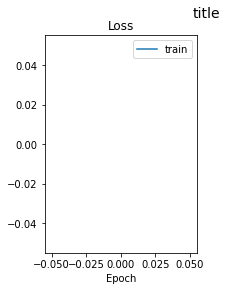

In [14]:
import matplotlib.pyplot as plt 

print(res)

def plot_history(res) -> None:
	plt.suptitle("title", fontsize=14)
	ax1 = plt.subplot(121)
	ax1.set_title("Loss")
	result_mapped = list(map(lambda x: x.acc, res))
	ax1.plot(result_mapped, label="train")
	plt.xlabel("Epoch")
	ax1.legend()
plot_history(res)

In [4]:
# Code for 1.3.7, 1.3.8, 1.3.9
import numpy as np
from NeuralNetwork import ANN
from DataSplit import DataSet

epochs = [100, 200, 500]
learning_rates = [0.1, 0.01, 0.05]
num_classes = 7
layers_struct = [
	[7, num_classes],
	[10, num_classes],
	[20, num_classes],
	[30, num_classes],
	[10, 15, num_classes]
]

def cv(epochs, learning_rate, layers_struct):
	ds = DataSet(0.1)
	k = 5
	splits = ds.split_for_cross(k)
	best_score = 0
	best_param = None
	for e in epochs:
		for lr in learning_rate:
			for ls in layers_struct:
				score = 0
				for train_set_f, train_set_t, val_set_f, val_set_t in splits:
					ann = ANN(train_set_f.shape[1], ls, learning_rate=lr)

					ann.fit_2(train_set_f, train_set_t, num_classes, e)
					score += ann.predict_acc(val_set_f, val_set_t)
				score /= k
				if score > best_score:
					best_score = score
					best_param = {"lr" : lr, "ls" : ls, "epochs" : e}
	print(best_param)
	print(best_score)

	ann = ANN(ds.train_features.shape[1], best_param["ls"], learning_rate=best_param["lr"])
	ann.fit_2(ds.train_features, ds.train_targets, num_classes, best_param["epochs"])
	print("score on test set", ann.predict_acc(ds.test_features, ds.test_targets))
	return best_param

print(cv(epochs, learning_rates, layers_struct))
    

KeyboardInterrupt: 

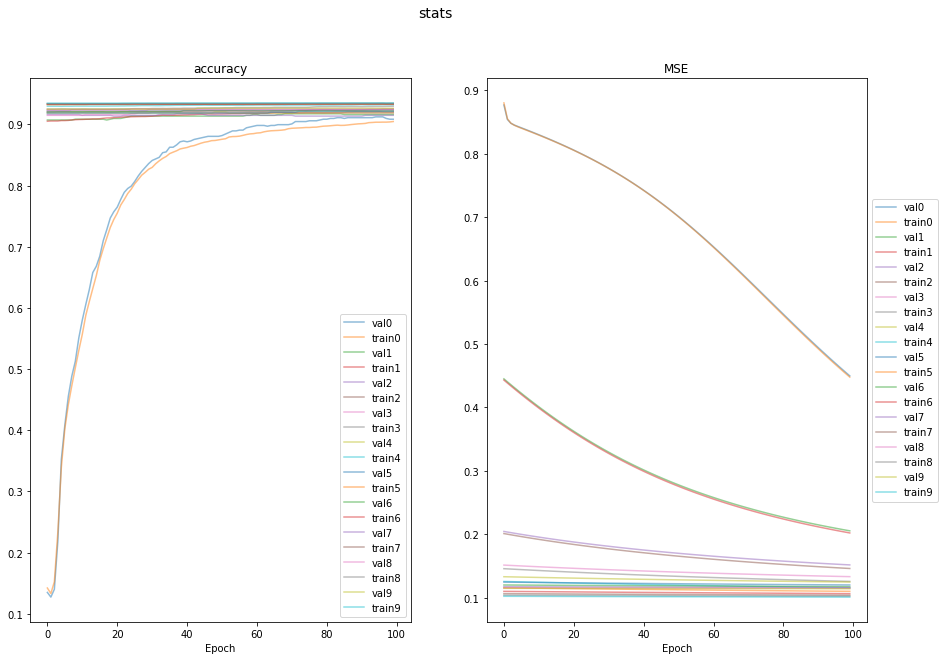

In [41]:
# 1.3.10 and 1.4.12
import numpy as np
from NeuralNetwork import ANN
from DataSplit import DataSet
import matplotlib.pyplot as plt

num_classes = 7

plt.figure(figsize=(15,10))

def plot_history(res, number) -> None:
	plt.suptitle("stats", fontsize=14)
	ax1 = plt.subplot(121)
	ax1.set_title("accuracy")
	val_acc_mapped = list(map(lambda x: x.val_acc, res))
	val_loss_mapped = list(map(lambda x: x.val_loss, res))
	loss_mapped = list(map(lambda x: x.loss, res))
	acc_mapped = list(map(lambda x: x.acc, res))
	ax1.plot(val_acc_mapped, label="val" + str(number), alpha=0.5)
	ax1.plot(acc_mapped, label="train" + str(number), alpha=0.5)
	plt.xlabel("Epoch")
	ax1.legend()

	ax2 = plt.subplot(122)
	ax2.set_title("MSE")
	ax2.plot(val_loss_mapped, label="val" + str(number), alpha=0.5)
	ax2.plot(loss_mapped, label="train" + str(number), alpha=0.5)
	plt.xlabel("Epoch")
	ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ds = DataSet(0.1)
best_param = {'lr': 0.1, 'ls': [30, 7], 'epochs': 500}

ann = ANN(ds.train_features.shape[1], best_param["ls"], learning_rate=best_param["lr"])
total_history = []
for i in range(10):
	history = ann.fit_2_improved(ds.train_features, ds.train_targets, ds.test_features, ds.test_targets, num_classes, best_param["epochs"])
	total_history.append(history)

for i in range(10):
	plot_history(total_history[i], i)


{7: [0.7493638676844784, 0.6870229007633588, 0.727735368956743], 15: [0.8676844783715013, 0.8498727735368957, 0.8536895674300254], 30: [0.9071246819338422, 0.9020356234096693, 0.8918575063613231]}


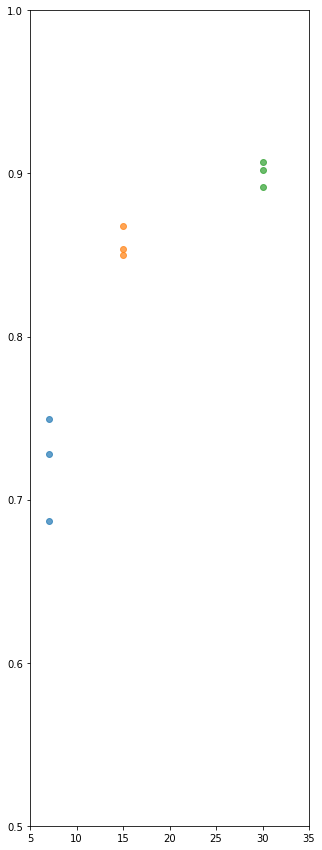

In [6]:
# 1.4.11
import numpy as np
from NeuralNetwork import ANN
from DataSplit import DataSet
import matplotlib.pyplot as plt

layer_structures = [
	[7, 7],
	[15, 7],
	[30, 7],
]

ds = DataSet(0.1)
best_param = {'lr': 0.1, 'epochs': 500}

total_history = {}
for ls in layer_structures:
	for i in range(3):
		ann = ANN(ds.train_features.shape[1], ls, learning_rate=best_param["lr"])
		ann.fit_2(ds.train_features, ds.train_targets, num_classes, best_param["epochs"])
		if ls[0] not in total_history:
			total_history[ls[0]] = []
		total_history[ls[0]].append(ann.predict_acc(ds.test_features, ds.test_targets))
	
print(total_history)

plt.figure(figsize=(5,15))
plt.xlim((5, 35))
plt.ylim((0.5, 1))
for key in total_history:
	plt.scatter(np.repeat([key], len(total_history[key])), total_history[key], label=key, alpha = 0.7)

